<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

<font size="4"> A) Импортируем библиотеки</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

<font size="4"> B) Прочитаем датасет и выведем общую информацию</font>

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<font size="4"> C) Посмотрим на таблицу и выведем статистику </font>

In [3]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16558,6,"2,200,000.00",73.00,2018-12-28T00:00:00,3,2.65,5.00,47.00,1,NaN,False,False,8.40,nan,поселок Котельский,nan,nan,nan,nan,nan,nan,nan
21051,1,"4,178,000.00",49.00,2017-08-07T00:00:00,4,2.50,5.00,38.00,1,NaN,False,False,6.40,nan,Санкт-Петербург,"11,455.00","15,821.00",0.00,nan,0.00,nan,169.00
6347,13,"19,980,000.00",88.30,2018-08-31T00:00:00,3,2.80,24.00,53.40,5,NaN,False,False,13.10,nan,Санкт-Петербург,"10,663.00","12,738.00",0.00,nan,0.00,nan,140.00
455,20,"8,500,000.00",65.00,2019-04-24T00:00:00,3,2.55,7.00,43.00,2,NaN,False,False,7.50,nan,Санкт-Петербург,"28,927.00","7,866.00",2.00,15.00,3.00,293.00,nan
15253,3,"3,200,000.00",45.00,2017-06-21T00:00:00,2,2.50,5.00,28.00,4,NaN,False,False,6.00,1.00,Санкт-Петербург,"42,523.00","8,973.00",2.00,511.00,0.00,nan,34.00
3475,8,"5,800,000.00",46.80,2017-11-24T00:00:00,2,2.90,7.00,29.40,2,NaN,False,False,8.00,nan,Санкт-Петербург,"28,474.00","7,413.00",1.00,287.00,2.00,656.00,89.00
955,12,"11,100,000.00",95.00,2018-04-20T00:00:00,3,nan,10.00,53.00,6,NaN,False,False,13.00,nan,Санкт-Петербург,"30,894.00","4,087.00",1.00,696.00,1.00,223.00,90.00
18864,15,"5,350,000.00",77.60,2017-11-10T00:00:00,2,nan,3.00,50.80,2,NaN,False,False,8.40,nan,Кронштадт,"68,338.00","50,064.00",1.00,228.00,3.00,184.00,35.00
22689,2,"3,253,000.00",40.30,2018-08-09T00:00:00,1,nan,25.00,14.91,6,NaN,False,False,12.96,nan,Кудрово,nan,nan,nan,nan,nan,nan,27.00
20816,6,"2,600,000.00",43.00,2018-03-26T00:00:00,1,2.85,11.00,18.00,8,NaN,False,False,11.00,2.00,поселок Романовка,nan,nan,nan,nan,nan,nan,198.00


In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

<font size="3"> 1) Очень много пропущенных значений;  
    2) Наименования столбцов неинформативны и различаются по регистру;  
    3) Группировка столбцов - кошмар, не удобно смотреть;  
    4) Не верные типы данных</font>

## Предобработка данных

In [5]:
#переименуем названия столбцов и уберем заглавные буквы
new_columns = ['total_images',
              'last_price',
              'total_area_m2',
              'first_day_exposition',
              'rooms_count',
              'ceiling_height',
              'floors_count',
              'living_area_m2',
              'floor_number',
              'is_apartment',
              'is_studio',
              'is_open_plan',
              'kitchen_area_m2',
              'balconies_count',
              'town_name',
              'airports_nearest',
              'city_centers_nearest',
              'parks_around_3km',
              'parks_nearest',
              'ponds_around_3km',
              'ponds_nearest',
              'days_exposition'
              ]
df.set_axis(new_columns, axis='columns', inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'rooms_count', 'ceiling_height', 'floors_count', 'living_area_m2',
       'floor_number', 'is_apartment', 'is_studio', 'is_open_plan',
       'kitchen_area_m2', 'balconies_count', 'town_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around_3km', 'parks_nearest',
       'ponds_around_3km', 'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
#выстроим столбцы в логическом порядке
df = df[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height',
 'rooms_count',
 'balconies_count',
 'floor_number',
 'floors_count',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_centers_nearest',
 'airports_nearest',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest'
]]
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,NaN,False,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,посёлок Шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,Санкт-Петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,NaN,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,Санкт-Петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [7]:
#посмотрим количество значений в столбце с названием города
len(df['town_name'].unique())

365

In [8]:
#приведем названия городов к нижнему регистру и заменим букву "ё" на "е"
df['town_name'] = df['town_name'].str.lower()
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

In [9]:
#проверим количество значений после изменения
len(df['town_name'].unique())

331

In [10]:
#убрали 34 дубля

In [11]:
#посмотрим пустые значения
df['town_name'].isna().sum()

49

In [12]:
#удалим строки без названия города, т.к не известно где находиться квартира, такие объекты будут мешать
#анализу, пользы для покупателей они не несут. Затем проверим удалились ли строки.
df = df.dropna(subset=['town_name'])
df['town_name'].isna().sum()

0

In [13]:
#посмотрим на столбец 'is_apartment'
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [14]:
#заменим пустые значения на False, т.к относятся к объектам жилого фонда
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

In [15]:
#проверим столбец 'is_studio'
df['is_studio'].unique()

array([False,  True])

In [16]:
#проверим столбец 'is_open_plan'
df['is_open_plan'].unique()

array([False,  True])

In [17]:
#разберемся  с балконами. Скорее всего пустые значения появились, потому что пользователь не стал указывать то чего нет.
#заменим пустые значения на "0".
df['balconies_count'] = df['balconies_count'].fillna(0)
#сразу изменим тип данных с вещественного на целочисленный, исходя из бытовой логики.
df['balconies_count'] = df['balconies_count'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [18]:
#изменим тип данных для столбца 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [19]:
#в столбце с количеством дней размещения объявления есть пустые значения, возможно из-за того, что пользователь выложил 
#объявление и затем в течение суток передумал и удалил его. 
#найдем сумму пустых значений, заменим на нули и переведем в целочисленный вид
df['days_exposition'].isna().sum()

3180

In [20]:
#не так уж и много, заменяем и переводим
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'] = df['days_exposition'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
town_name               23650 non-null object
total_area_m2           23650 non-null float64
living_area_m2          21752 non-null float64
kitchen_area_m2         21381 non-null float64
ceiling_height          14490 non-null float64
rooms_count             23650 non-null int64
balconies_count         23650 non-null int64
floor_number            23650 non-null int64
floors_count            23565 non-null float64
is_apartment            23650 non-null bool
is_studio               23650 non-null bool
is_open_plan            23650 non-null bool
total_images            23650 non-null int64
last_price              23650 non-null int64
first_day_exposition    23650 non-null datetime64[ns]
days_exposition         23650 non-null int64
city_centers_nearest    18139 non-null float64
airports_nearest        18116 non-null float64
parks_around_3km        18140 non-null float64
parks_nearest

<font size="3"> Заменили пустые значения и изменили тип данных, где это возможно. Для пропусков в данных, которые зависят от пользователя сложно подобрать адекватные значения, медиана или среднее могут исказить итоговый результат. Среди причин возникновения пропусков, самыми объективными являются: человеческая лень, либо незнание требуемых величин </font>

## Рассчёты и добавление результатов в таблицу

In [22]:
# добавим цену квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [23]:
#добавим день недели, месяц и год публикации
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,0,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,"120,370.37",Thursday,March,2019
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04,81,"18,603.00","12,817.00",0.00,nan,0.00,nan,"82,920.79",Tuesday,December,2018
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,"92,785.71",Thursday,August,2015
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,"408,176.10",Friday,July,2015
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,"100,000.00",Tuesday,June,2018


In [24]:
#добавим этажи
def floor_status(row):
    if row['floor_number'] == 1:
        return 'первый'
    elif row['floor_number'] == row['floors_count']:
        return 'последний'
    else:
        return 'другой'
df['floor_status'] = df.apply(floor_status, axis=1)
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,0,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,"120,370.37",Thursday,March,2019,другой
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04,81,"18,603.00","12,817.00",0.00,nan,0.00,nan,"82,920.79",Tuesday,December,2018,первый
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,"92,785.71",Thursday,August,2015,другой
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,"408,176.10",Friday,July,2015,другой
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,"100,000.00",Tuesday,June,2018,другой


In [25]:
#найдем соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,0,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,"120,370.37",Thursday,March,2019,другой,0.47,0.23
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04,81,"18,603.00","12,817.00",0.00,nan,0.00,nan,"82,920.79",Tuesday,December,2018,первый,0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,"408,176.10",Friday,July,2015,другой,nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41


## Исследовательский анализ данных

<font size="4"> 4.1 Построим гистограммы параметров </font>

count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area_m2, dtype: float64

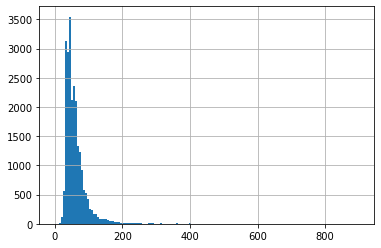

In [26]:
#построим гистограмму общей площади
df['total_area_m2'].hist(bins=150, range=(0, 900))
df['total_area_m2'].describe()

count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

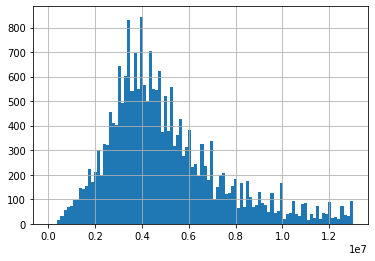

In [27]:
#построим гистограмму цены 
df['last_price'].hist(bins=100, range=(0, 13000000))
df['last_price'].describe()

count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms_count, dtype: float64

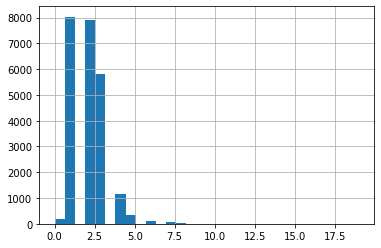

In [28]:
#построим гистограмму числа комнат
df['rooms_count'].hist(bins=30, range=(0, 19))
df['rooms_count'].describe()

count   14,490.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

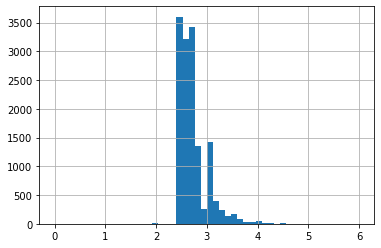

In [29]:
#посмотрим на высоту потолков
df['ceiling_height'].hist(bins=50, range=(0, 6))
df['ceiling_height'].describe()


<font size="3"> Ох, лол. Странностей очень много.  Площади в 12 и 900 квадратов, цены на квартиры от 12190 рублей до 763 млн рублей, отличный разброс.  Количество комнат от 0 до 19 штук и мое любимое, высота потолков от 1 до 100 метров.  Я думаю что такие значения вызваны человеческим фактором: лишние нули при заполнении или забыли добавить ноль, лень было писать и просто поставили рандомное число, хотели пошутить. </font>

<font size="4"> 4.2 Изучим время продажи квартир </font>

count   23,650.00
mean       156.45
std        213.56
min          0.00
25%         22.00
50%         73.00
75%        198.00
max      1,580.00
Name: days_exposition, dtype: float64

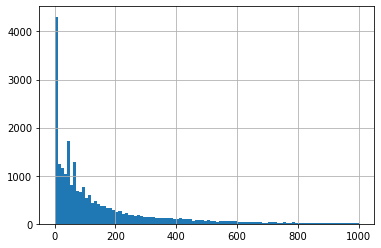

In [30]:
#будем считать временем продажи квартир столбец 'days_exposition', время с момента публикации, до его снятия.
#посмотрим на высоту потолков
df['days_exposition'].hist(bins=100, range=(0, 1000))
df['days_exposition'].describe()
#средннее 156.45, медиана 73, обычно продажа занимает 73 дня, все что меньше 22 дней - очень быстро,все что больше 198 дней
#очень долго

<font size="4"> 4.3 Убираем редкие и выбивающиеся значения </font>

In [31]:
# Напишем функцию для удаления выбросов

def deletizer(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    interval = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    return df.loc[interval]

In [32]:
#создадим таблицу с данными до обработки и посчитаем среднее значение
bad_data = df[['total_area_m2', 'last_price', 'days_exposition', 'rooms_count','ceiling_height']].mean()
bad_data

total_area_m2            60.33
last_price        6,541,126.90
days_exposition         156.45
rooms_count               2.07
ceiling_height            2.77
dtype: float64

In [33]:
#проедемся по столбцам deletizer'ом
deletizer(df, 'total_area_m2')['total_area_m2'].mean().round(decimals=2)

54.33

In [34]:
deletizer(df, 'last_price')['last_price'].mean().round(decimals=2)

4838942.09

In [35]:
deletizer(df, 'days_exposition')['days_exposition'].mean().round(decimals=2)

103.71

In [36]:
deletizer(df, 'rooms_count')['rooms_count'].mean().round(decimals=2)

2.05

In [37]:
deletizer(df, 'ceiling_height')['ceiling_height'].mean().round(decimals=2)

2.68

<font size="3"> Средние значения снизились </font>

<font size="4"> 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. </font>

In [38]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,0,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,"120,370.37",Thursday,March,2019,другой,0.47,0.23
1,поселок шушары,40.40,18.60,11.00,nan,1,2,1,11.00,False,False,False,7,3350000,2018-12-04,81,"18,603.00","12,817.00",0.00,nan,0.00,nan,"82,920.79",Tuesday,December,2018,первый,0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,"408,176.10",Friday,July,2015,другой,nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41


In [39]:
corr = df[['price_per_meter',\
           'total_area_m2',\
           'city_centers_nearest',\
           'rooms_count']].corr().round(decimals=2)
corr.style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area_m2,city_centers_nearest,rooms_count
price_per_meter,1,0.3,-0.32,0.06
total_area_m2,0.3,1,-0.23,0.76
city_centers_nearest,-0.32,-0.23,1,-0.18
rooms_count,0.06,0.76,-0.18,1


<font size="3"> Цена в большей степени зависит от количества комнат, чем от общей площади. Расстояние до центра показывает отрицательную корреляцию, но что-то я сомневаюсь. </font>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


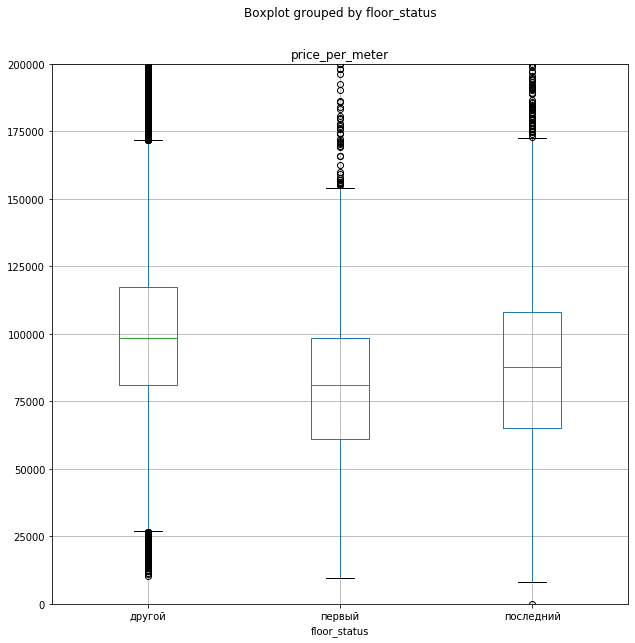

In [40]:
#посмотрим на зависимость цены от расположения на этажах
plot = df.boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)

<font size="3"> Квартиры на первом этаже дешевле чем остальные. </font>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


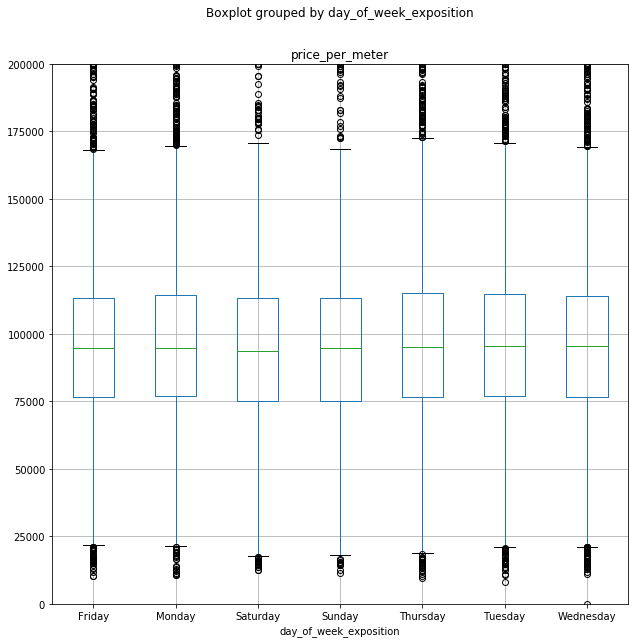

In [41]:
#посмотрим на зависимость цены от дня размещения заявления
plot = df.boxplot('price_per_meter', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,200000)

<font size="3"> От дня выгрузки заявления, цена не так уж и меняется. </font>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


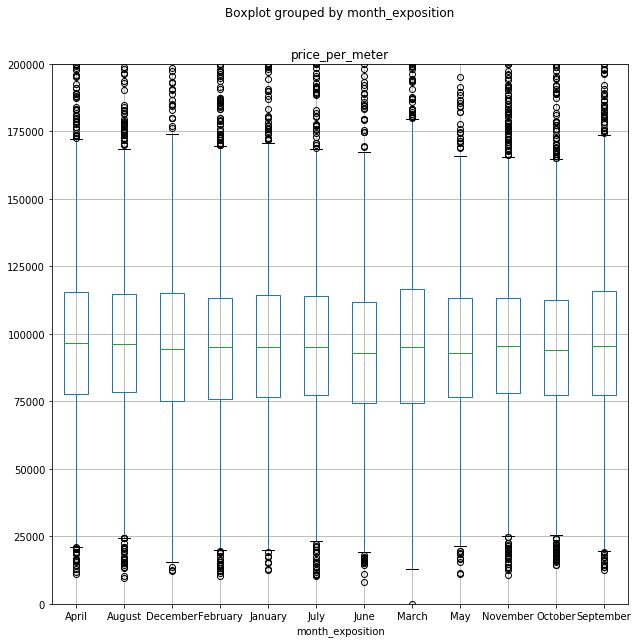

In [42]:
#посмотрим на зависимость цены от месяца размещения заявления
plot = df.boxplot('price_per_meter', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)

<font size="3"> От месяца выгрузки заявления, цена практически не меняется. Думаю с годами будет интереснее. </font>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


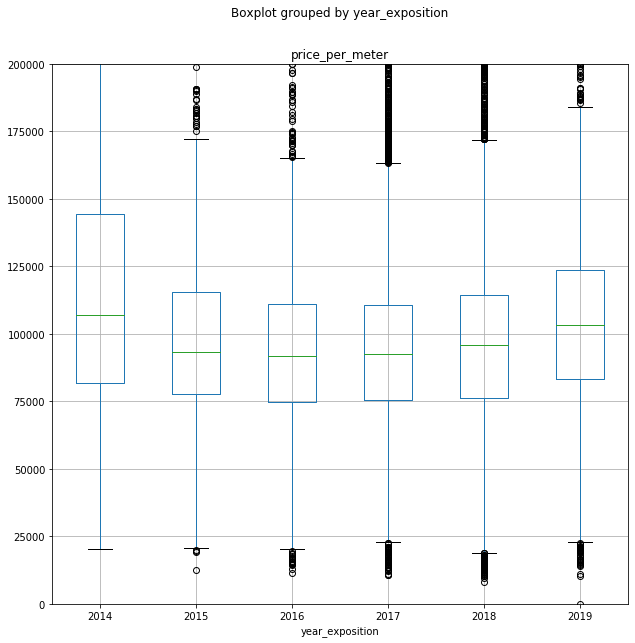

In [43]:
#посмотрим на зависимость цены от года размещения заявления
plot = df.boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

<font size="3"> Куда-то улетел 2014 год. Попробуем исправить и удалим аномальные значения </font>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 200000)

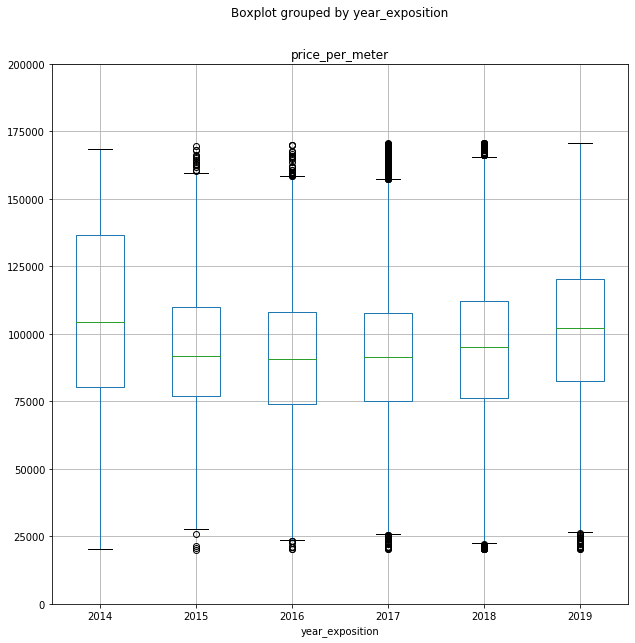

In [44]:
deletizer(df, 'price_per_meter').boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

<font size="3"> Видим что с 2014-2016 год стоимость квартир снижалась, с 2017 и по 2019 стоимость начала расти, рост продолжается до сих пор. </font>

<font size="4"> 4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. </font>

In [45]:
#посмотрим на количество объявлений по городам и выведем топ-10 по количеству объявлений
df['town_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: town_name, dtype: int64

In [46]:
#найдем среднее значение цены за квадратный метр и выведем топ-10 самых дорогих
town_rate = df.pivot_table(index = 'town_name', values='price_per_meter', aggfunc='mean')
town_rate.sort_values(by='price_per_meter', ascending=False).head(10)

,price_per_meter
town_name,
зеленогорск,"115,122.80"
санкт-петербург,"114,849.01"
поселок репино,"104,238.61"
пушкин,"103,125.82"
сестрорецк,"101,757.62"
поселок лисий нос,"100,660.82"
кудрово,"100,253.04"
деревня мистолово,"98,549.98"
поселок левашово,"96,997.69"


In [47]:
#выведем топ-10 самых дешевых
town_rate.sort_values(by='price_per_meter', ascending=True).head(10)


,price_per_meter
town_name,
деревня старополье,"11,206.22"
поселок станции свирь,"11,481.48"
деревня вахнова кара,"11,688.31"
деревня выскатка,"12,335.48"
поселок совхозный,"12,629.13"
деревня малая романовка,"12,724.55"
поселок тесово-4,"12,931.03"
деревня сижно,"13,709.68"
деревня ям-тесово,"13,711.56"


<font size="3"> Чтож, чем дальше в лес, тем дешевле квадратные метры. </font>

<font size="4"> 4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. </font>

In [48]:
#выделим квартиры которые находятся в Санкт-Петербурге
piter = df.query('town_name == "санкт-петербург"')
#создадим столюец с расстоянием до центра в км.
piter['city_centers_nearest_km'] = (piter['city_centers_nearest'] / 1000).round()
piter.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height,rooms_count,balconies_count,floor_number,floors_count,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio,city_centers_nearest_km
0,санкт-петербург,108.00,51.00,25.00,2.70,3,0,8,16.00,False,False,False,20,13000000,2019-03-07,0,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,"120,370.37",Thursday,March,2019,другой,0.47,0.23,16.00
2,санкт-петербург,56.00,34.30,8.30,nan,2,0,4,5.00,False,False,False,10,5196000,2015-08-20,558,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,"92,785.71",Thursday,August,2015,другой,0.61,0.15,14.00
3,санкт-петербург,159.00,nan,nan,nan,3,0,9,14.00,False,False,False,0,64900000,2015-07-24,424,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,"408,176.10",Friday,July,2015,другой,nan,nan,7.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,0,13,14.00,False,False,False,2,10000000,2018-06-19,121,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,"100,000.00",Tuesday,June,2018,другой,0.32,0.41,8.00
7,санкт-петербург,71.60,nan,18.90,nan,2,2,22,24.00,False,False,False,5,7915000,2019-04-18,0,"11,634.00","23,982.00",0.00,nan,0.00,nan,"110,544.69",Thursday,April,2019,другой,nan,0.26,12.00


In [49]:
#создадим сводную таблицу с ценой и расстоянием до центра и найдем среднюю
piter_price_for_km = piter.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
piter_price_for_km.head(10)

,last_price
city_centers_nearest_km,
0.00,"31,449,115.85"
1.00,"21,206,720.83"
2.00,"17,788,319.61"
3.00,"11,126,581.00"
4.00,"13,304,279.53"
5.00,"14,499,121.06"
6.00,"15,338,418.39"
7.00,"14,775,152.59"
8.00,"9,957,716.83"


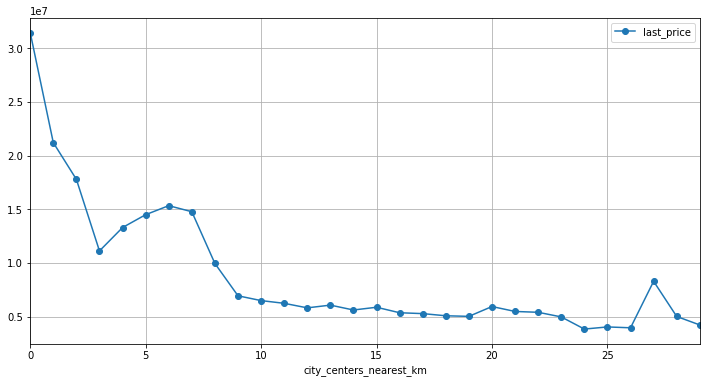

In [50]:
piter_price_for_km.plot(style='o-', grid=True, figsize=(12, 6))

<font size="3"> Цена сильно меняется в пределах 0-10 км, далее изменение цены не значительное. </font>

<font size="4"> 4.7 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу? </font>

In [51]:
#выделим сегмент квартир в центре и посмотрим на средние показатели
city_centr_df = piter.query('city_centers_nearest_km < 10').pivot_table(
    index='town_name', 
    values=['total_area_m2', 
            'price_per_meter',
            'rooms_count', 
            'ceiling_height'])
city_centr_df

,ceiling_height,price_per_meter,rooms_count,total_area_m2
town_name,,,,
санкт-петербург,3.09,"138,715.03",2.67,86.44


In [52]:
#посмотрим показатели по всему городу
city_all = piter.pivot_table(
    index='town_name', 
    values=['total_area_m2', 
            'price_per_meter',
            'rooms_count', 
            'ceiling_height'])
city_all

,ceiling_height,price_per_meter,rooms_count,total_area_m2
town_name,,,,
санкт-петербург,2.80,"114,849.01",2.17,64.75


In [53]:
#выделим факторы которые влияют на стоимость квартиры в центре.
cor_in_center = piter.query('city_centers_nearest_km < 10').corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_in_center.style.background_gradient('coolwarm')


,index,last_price
0,last_price,1
1,price_per_meter,0.777451
2,total_area_m2,0.643813
3,living_area_m2,0.549097
4,kitchen_area_m2,0.508427
5,rooms_count,0.351014
6,total_images,0.133267
7,ponds_around_3km,0.126835
8,parks_around_3km,0.116525
9,floor_number,0.0877579


<font size="3"> Выявили средние показатели для квартир в центре, там все больше и дороже. На стоимость квартиры в центре влияют 
    1. Цена за кв.м  
    2. Общая площадь  
    3. Соотношение площадей  
    4. Количество комнат  
    5. Картинки и расположение до прудов и парков. </font>

## Общий вывод

1. Уделить внимание данным которые поступают с сервера, очень много пустых значений
2. По максимому автоматизировать процесс заполнения данных по расстаяниям: до парков, водоемов, аэропортов
3. Считать расстояния в км, и целых числах
4. Ну и в ходе исследования выяснили, что цены на недвижимость в Питере зависят от расположения, чем ближе к центру тем дороже, к переферии дешевле. 
5. На стоимость влияют цена за квадрат, общая площадь и соотношение площадей, количество комнат. Остальное не так уж и важно.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод